In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [42]:
memory_6000_run = pd.read_csv(
    f"memory_dummy_RTX6000Ada_gpu_only_copy.csv", header=None, names=["M", "latency", "throughput", "power", "energy", "frequency", ""]
)
memory_6000_run.set_index(["M"], inplace=True)

memory_L4_run = pd.read_csv(
    f"memory_dummy_L4_gpu_only_copy.csv", header=None, names=["M", "latency", "throughput", "power", "energy", "frequency", ""]
)
memory_L4_run.set_index(["M"], inplace=True)

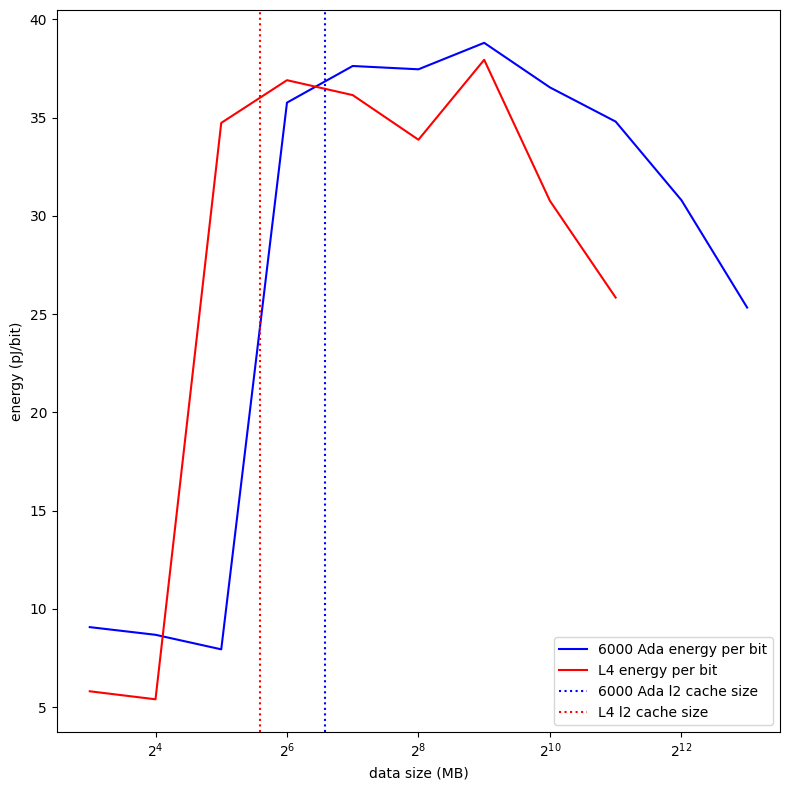

In [43]:
M_list = []
energy_6000_run_list = []
energy_6000_per_bit_list = []
latency_6000_run_list = []
energy_L4_run_list = []
energy_L4_per_bit_list = []
latency_L4_run_list = []
for M in range(5, 16):
    M = 2**M
    M_list.append(M * 256 * 512 * 2 / 1024 / 1024)
    energy_6000_run_list.append(memory_6000_run.loc[M, "energy"])
    energy_6000_per_bit_list.append(memory_6000_run.loc[M, "energy"] / (M * 256 * 512 * 16 * 2))
    latency_6000_run_list.append(float(memory_6000_run.loc[M, "latency"][:-3]) / (M * 256 * 512 * 16 * 2 * 1e-12))
    if (M <= 2**13):
        energy_L4_run_list.append(memory_L4_run.loc[M, "energy"])
        energy_L4_per_bit_list.append(memory_L4_run.loc[M, "energy"] / (M * 256 * 512 * 16 * 2))
        latency_L4_run_list.append(float(memory_L4_run.loc[M, "latency"][:-3]) / (M * 256 * 512 * 16 * 2 * 1e-12))
    
fig, ax1 = plt.subplots(figsize=(8, 8))
ax1.set_xlabel("data size (MB)")
ax1.set_xscale("log", base=2)
ax1.plot(M_list, energy_6000_per_bit_list, marker="", label=f"6000 Ada energy per bit", color='blue')
ax1.plot(M_list[:-2], energy_L4_per_bit_list, marker="", label=f"L4 energy per bit", color='red')

ax1.set_ylabel('energy (pJ/bit)')

ax1.axvline(x=96, color='blue', linestyle='dotted', label='6000 Ada l2 cache size')
ax1.axvline(x=48, color='red', linestyle='dotted', label='L4 l2 cache size')


# ax2 = ax1.twinx()
# ax2.plot(M_list, latency_6000_run_list, marker="", label=f"6000 Ada latency ms", color='lightblue', linestyle='dashed')
# ax2.plot(M_list[:-2], latency_L4_run_list, marker="", label=f"L4 latency ms", color='salmon', linestyle='dashed')
# ax2.set_ylabel('latency (ps/bit)')


plt.legend()
plt.tight_layout()
plt.show()